# Breast Cancer Classifier using ANN

## Data Loading

**Set Global Random Seed/State Value**

In [1]:
seed_value = 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
print(cancer.target_names)

['malignant' 'benign']


In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df['target'] = df['target'].astype('int64')

## Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

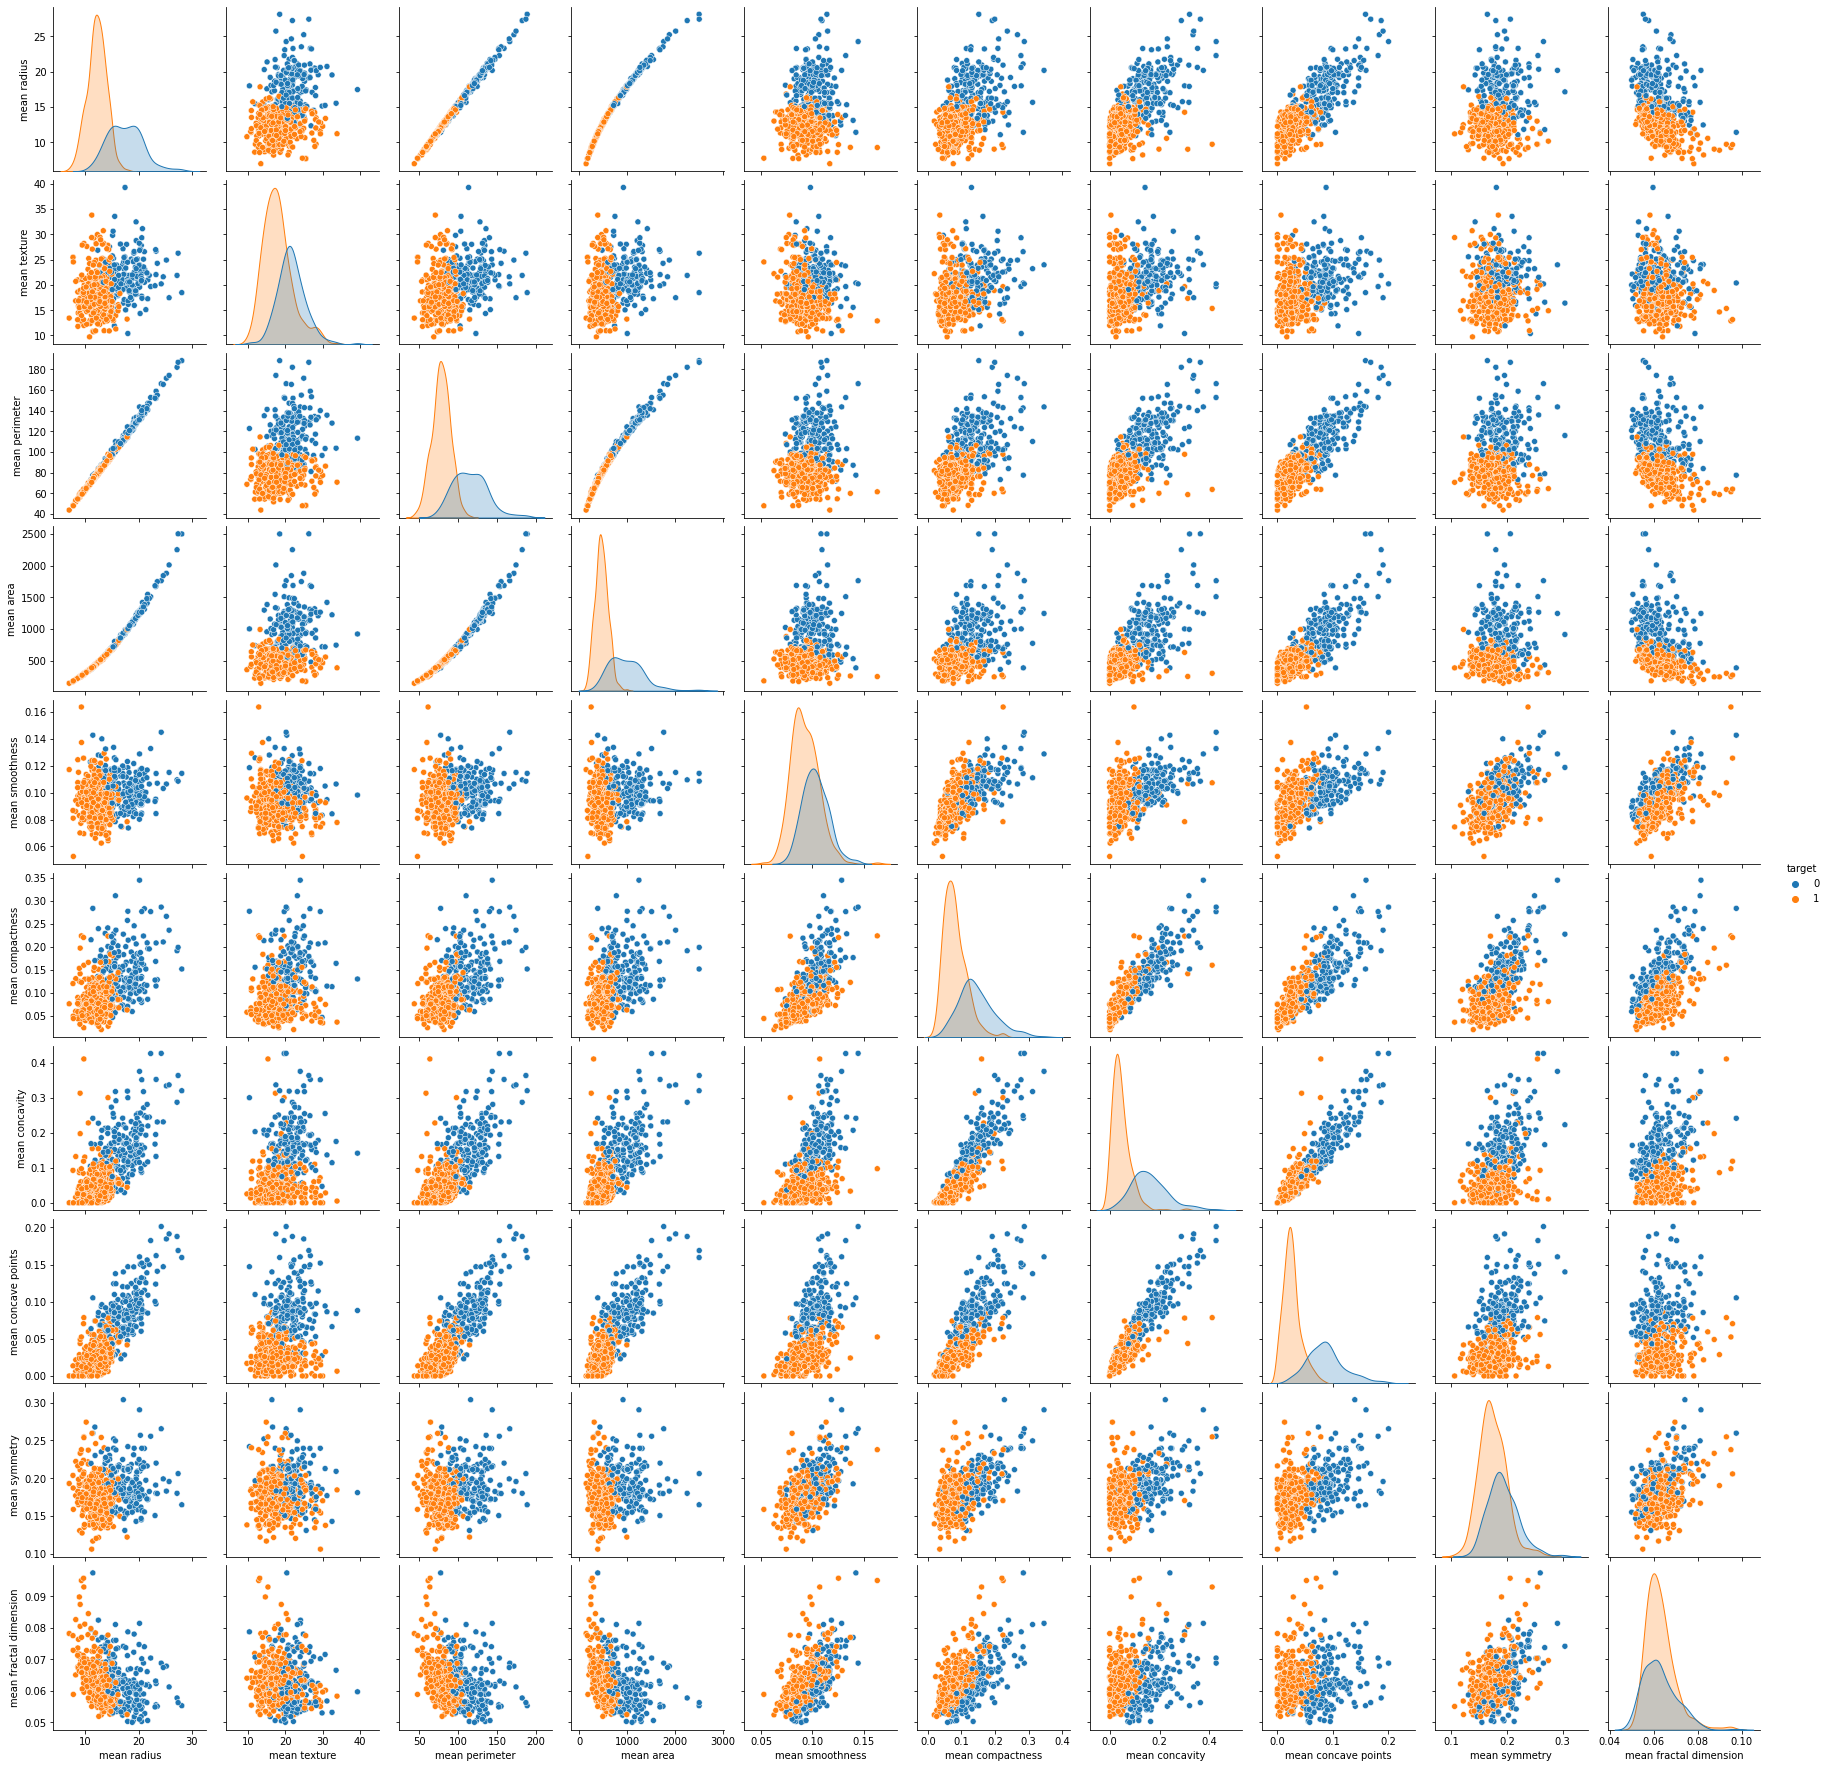

In [13]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'])

In [14]:
df_visualize = df.copy()
df_visualize['target'] = df_visualize['target'].map({0:'malignant', 1:'benign'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


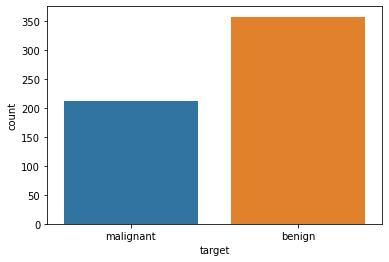

In [15]:
sns.countplot(df_visualize['target'], label = "Count")

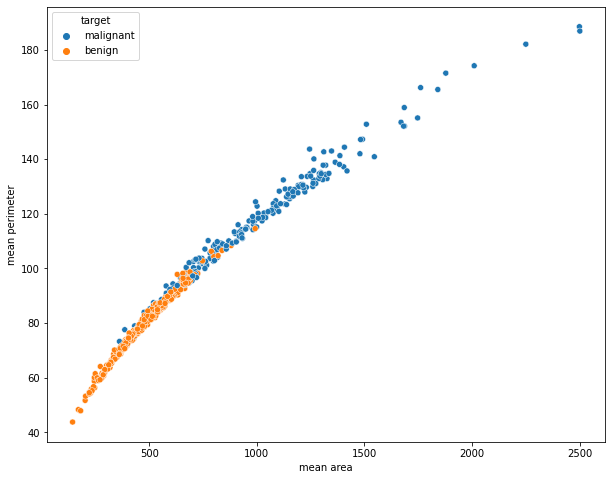

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_visualize, x='mean area', y='mean perimeter', hue='target')

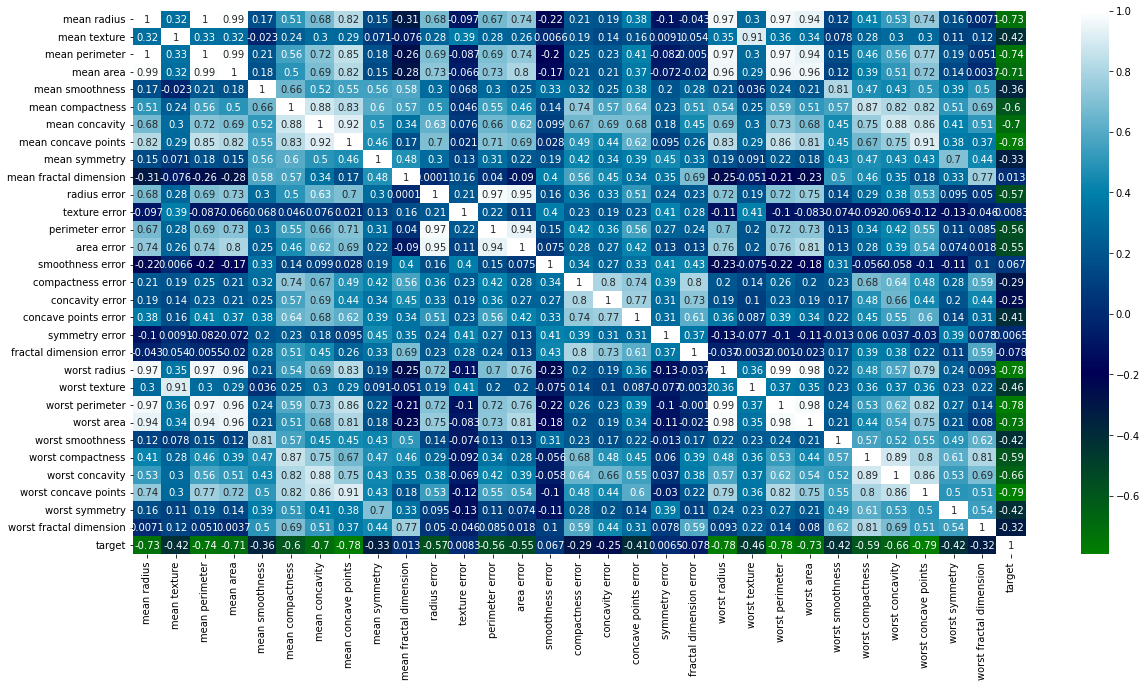

In [17]:
#checking the correlation between the variables
#strong correlation between the mean radius and mean perimeter, mean are and mean primeter

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='ocean')

## Data Preparation

In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [7]:
features = df.drop('target', axis=1).to_numpy()
scaled_features = min_max_scaler.fit_transform(features)
labels = df['target'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, stratify=labels)

## Training with different Hyperparameters

In [10]:
from sklearn.metrics import classification_report

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()
model.add(Dense(42, input_dim=features.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16)

Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 0.6605 - accuracy: 0.7341 - val_loss: 0.6092 - val_accuracy: 0.8860
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 0.5434 - accuracy: 0.8857 - val_loss: 0.4902 - val_accuracy: 0.8772
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8989 - val_loss: 0.3508 - val_accuracy: 0.8947
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.9099 - val_loss: 0.2715 - val_accuracy: 0.9211
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2062 - accuracy: 0.9187 - val_loss: 0.2140 - val_accuracy: 0.9386
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.1671 - accuracy: 0.9297 - val_loss: 0.1903 - val_accuracy: 0.9474
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9429 - val_loss: 0.1756 - val_accuracy: 0.9211
Epoch 8/100
2

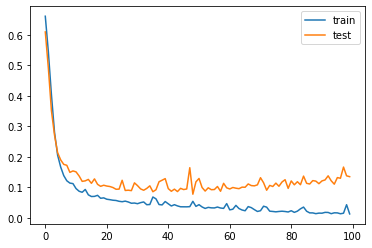

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

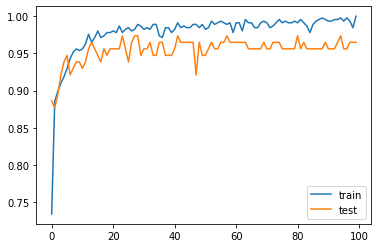

In [32]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [33]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f} %')

Accuracy: 96.49 %


In [34]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

4/4 [==============================] - 0s 3ms/step


In [35]:
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Batch Size

In [42]:
import time

________________________________________________
Experiment With Batch Size 4
Training Duration: 34 seconds
Accuracy: 97.37 %
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        42
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

________________________________________________
________________________________________________
Experiment With Batch Size 8
Training Duration: 19 seconds
Accuracy: 97.37 %
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        42
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

_____________________________________________

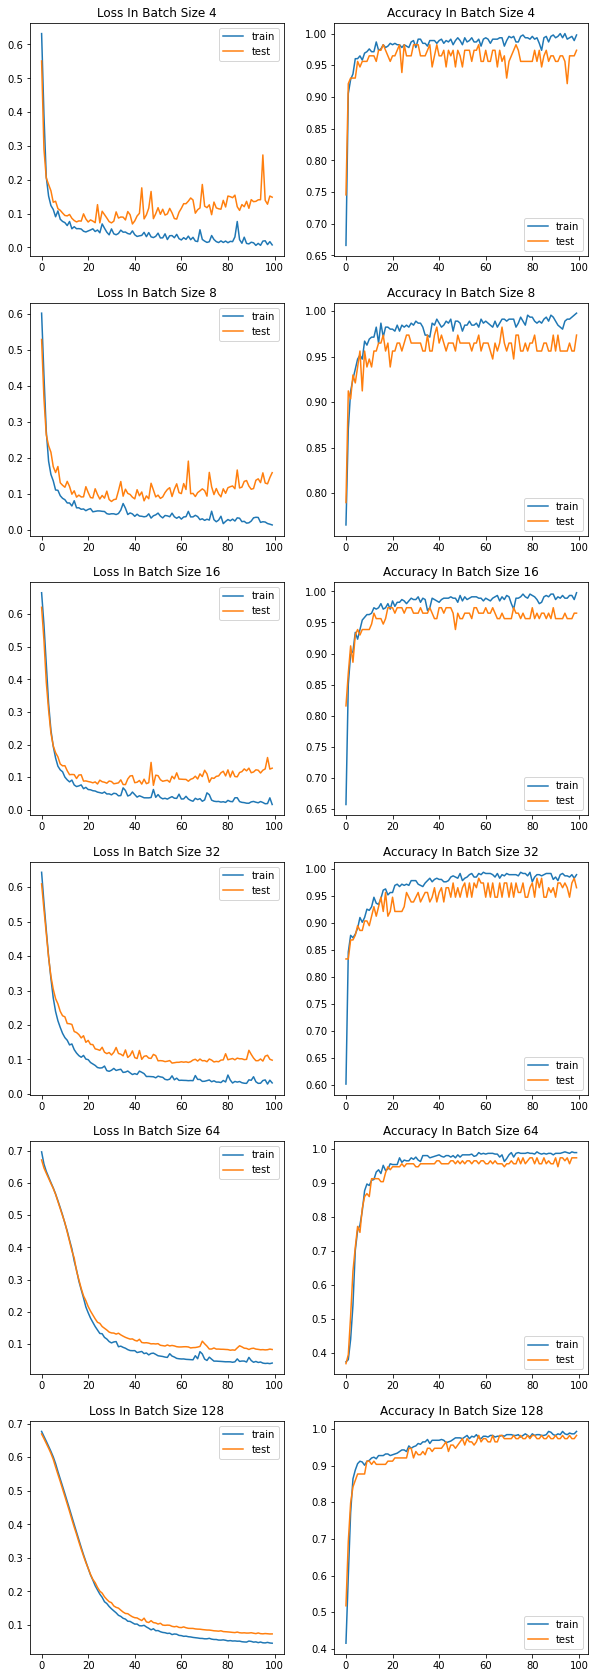

In [45]:
batch_sizes = [4,8,16,32,64,128]
fig, axes = plt.subplots(len(batch_sizes), 2, figsize=(10, len(batch_sizes)*5))
for i in range(len(batch_sizes)):
  model = Sequential()
  model.add(Dense(42, input_dim=features.shape[1], activation='relu'))
  model.add(Dense(24, activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  start = time.time()
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=batch_sizes[i], verbose=False)
  end = time.time()
  duration = end-start

  axes[i][0].plot(history.history['loss'], label='train')
  axes[i][0].plot(history.history['val_loss'], label='test')
  axes[i][0].legend()
  axes[i][0].set_title(f'Loss In Batch Size {batch_sizes[i]}')

  axes[i][1].plot(history.history['accuracy'], label='train')
  axes[i][1].plot(history.history['val_accuracy'], label='test')
  axes[i][1].legend()
  axes[i][1].set_title(f'Accuracy In Batch Size {batch_sizes[i]}')

  _, accuracy = model.evaluate(x_test, y_test, verbose=False)
  y_pred = model.predict(x_test, verbose=False)
  y_pred = np.round(y_pred)

  print('________________________________________________')
  print(f'Experiment With Batch Size {batch_sizes[i]}')
  print(f'Training Duration: {round(duration)} seconds')
  print(f'Accuracy: {accuracy*100:.2f} %')
  print(classification_report(y_test, y_pred, target_names=cancer.target_names))
  print('________________________________________________')

print('Learning Curve Graphs')
plt.show()

**BEST BATCH SIZE: 16**

#### Learning Rate

In [50]:
from keras.optimizers import SGD
import warnings
warnings.filterwarnings("ignore")

________________________________________________
Experiment With Learning Rate 1
Training Duration: 9 seconds
Accuracy: 95.61 %
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

________________________________________________
________________________________________________
Experiment With Learning Rate 0.1
Training Duration: 11 seconds
Accuracy: 97.37 %
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        42
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

______________________________________

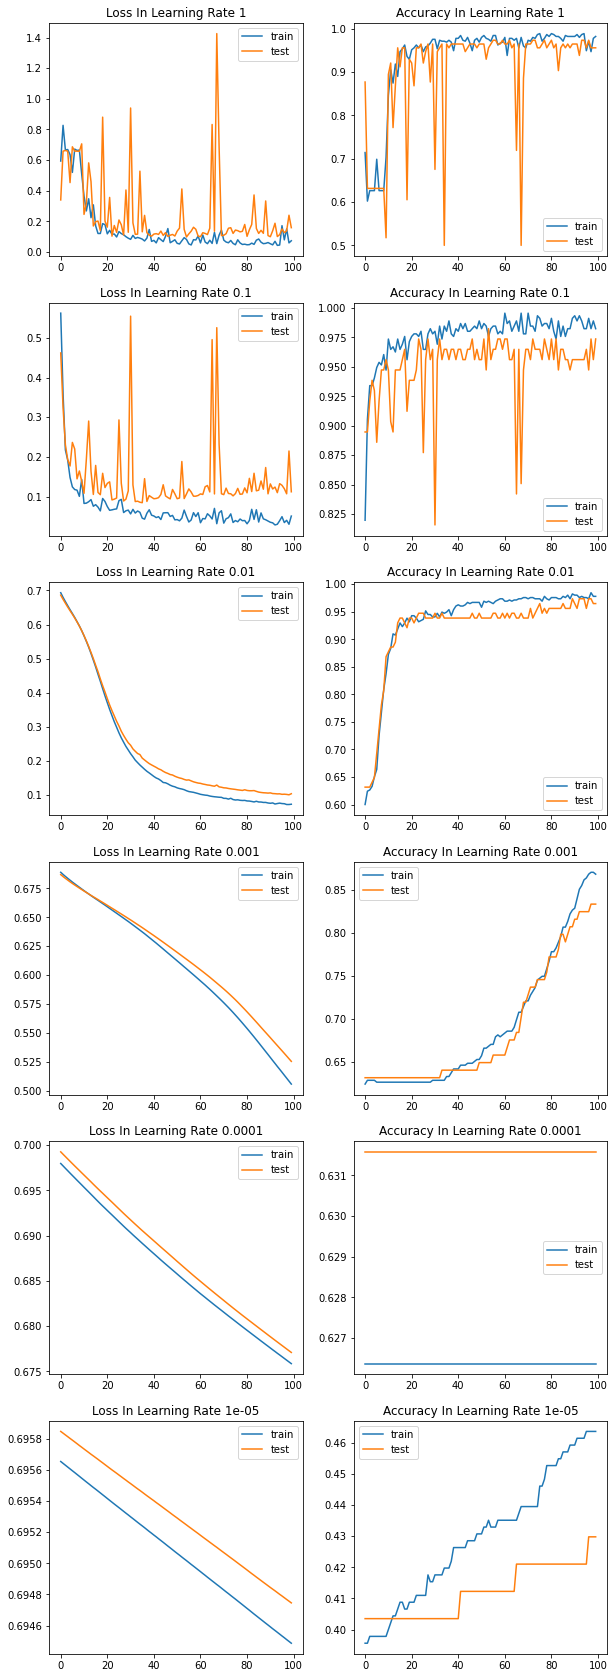

In [52]:
l_rates = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
fig, axes = plt.subplots(len(l_rates), 2, figsize=(10, len(l_rates)*5))
for i in range(len(l_rates)):
  model = Sequential()
  model.add(Dense(42, input_dim=features.shape[1], activation='relu'))
  model.add(Dense(24, activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  opt = SGD(learning_rate=l_rates[i])
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

  start = time.time()
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, verbose=False)
  end = time.time()
  duration = end-start

  axes[i][0].plot(history.history['loss'], label='train')
  axes[i][0].plot(history.history['val_loss'], label='test')
  axes[i][0].legend()
  axes[i][0].set_title(f'Loss In Learning Rate {l_rates[i]}')

  axes[i][1].plot(history.history['accuracy'], label='train')
  axes[i][1].plot(history.history['val_accuracy'], label='test')
  axes[i][1].legend()
  axes[i][1].set_title(f'Accuracy In Learning Rate {l_rates[i]}')

  _, accuracy = model.evaluate(x_test, y_test, verbose=False)
  y_pred = model.predict(x_test, verbose=False)
  y_pred = np.round(y_pred)

  print('________________________________________________')
  print(f'Experiment With Learning Rate {l_rates[i]}')
  print(f'Training Duration: {round(duration)} seconds')
  print(f'Accuracy: {accuracy*100:.2f} %')
  print(classification_report(y_test, y_pred, target_names=cancer.target_names))
  print('________________________________________________')

print('Learning Curve Graphs')
plt.show()

**BEST LEARNING RATE: 0.01**

#### Stochastic Gradient Descent (batch_size=1, lr=0.001)

________________________________________________
Accuracy In batch_size=1, lr=0.001
Training Duration: 82 seconds
Accuracy: 97.37 %
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        42
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

________________________________________________
Learning Curve Graphs


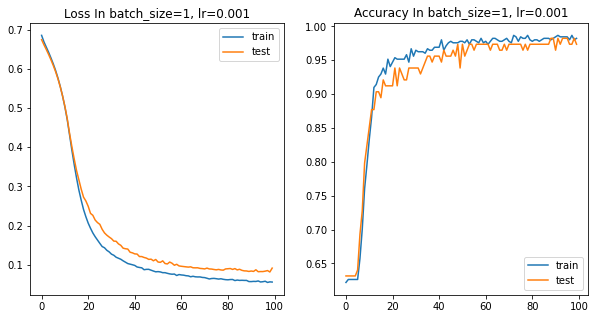

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

model = Sequential()
model.add(Dense(42, input_dim=features.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=1, verbose=False)
end = time.time()
duration = end-start

axes[0].plot(history.history['loss'], label='train')
axes[0].plot(history.history['val_loss'], label='test')
axes[0].legend()
axes[0].set_title(f'Loss In batch_size=1, lr=0.001')

axes[1].plot(history.history['accuracy'], label='train')
axes[1].plot(history.history['val_accuracy'], label='test')
axes[1].legend()
axes[1].set_title(f'Accuracy In batch_size=1, lr=0.001')

_, accuracy = model.evaluate(x_test, y_test, verbose=False)
y_pred = model.predict(x_test, verbose=False)
y_pred = np.round(y_pred)

print('________________________________________________')
print('Accuracy In batch_size=1, lr=0.001')
print(f'Training Duration: {round(duration)} seconds')
print(f'Accuracy: {accuracy*100:.2f} %')
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
print('________________________________________________')

print('Learning Curve Graphs')
plt.show()

batch_size=1, lr=0.001 produce similar results to batch_size=16, lr=0.01. However the Stochastic Gradient Descent approach trains 10x longer, because only 1 data is fitted per step/batch, and it learns so slow.

#### Activation and Loss Function

________________________________________________
Accuracy In Sigmoid, Binary Crossentropy
Training Duration: 11 seconds
Accuracy: 97.37 %
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        42
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

________________________________________________
________________________________________________
Accuracy In Softmax, Categorical Crossentropy
Training Duration: 21 seconds
Accuracy: 97.37 %
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        42
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

________________

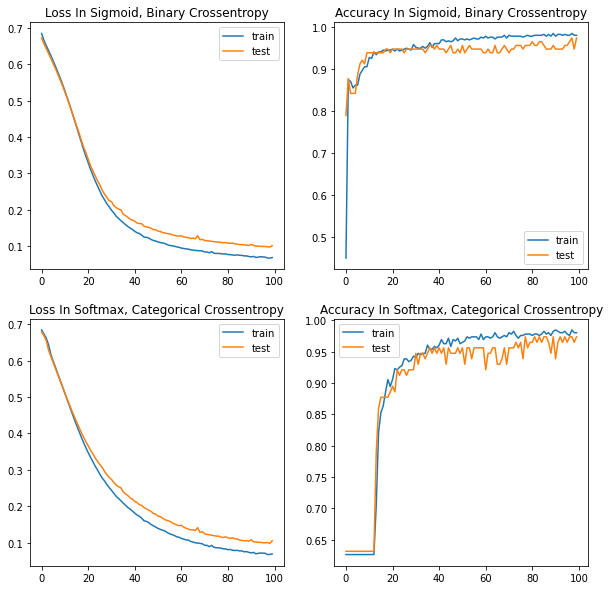

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

model = Sequential()
model.add(Dense(42, input_dim=features.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, verbose=False)
end = time.time()
duration = end-start

axes[0][0].plot(history.history['loss'], label='train')
axes[0][0].plot(history.history['val_loss'], label='test')
axes[0][0].legend()
axes[0][0].set_title(f'Loss In Sigmoid, Binary Crossentropy')

axes[0][1].plot(history.history['accuracy'], label='train')
axes[0][1].plot(history.history['val_accuracy'], label='test')
axes[0][1].legend()
axes[0][1].set_title(f'Accuracy In Sigmoid, Binary Crossentropy')

_, accuracy = model.evaluate(x_test, y_test, verbose=False)
y_pred = model.predict(x_test, verbose=False)
y_pred = np.round(y_pred)

print('________________________________________________')
print('Accuracy In Sigmoid, Binary Crossentropy')
print(f'Training Duration: {round(duration)} seconds')
print(f'Accuracy: {accuracy*100:.2f} %')
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
print('________________________________________________')

###################################################################

model = Sequential()
model.add(Dense(42, input_dim=features.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, verbose=False)
end = time.time()
duration = end-start

axes[1][0].plot(history.history['loss'], label='train')
axes[1][0].plot(history.history['val_loss'], label='test')
axes[1][0].legend()
axes[1][0].set_title(f'Loss In Softmax, Categorical Crossentropy')

axes[1][1].plot(history.history['accuracy'], label='train')
axes[1][1].plot(history.history['val_accuracy'], label='test')
axes[1][1].legend()
axes[1][1].set_title(f'Accuracy In Softmax, Categorical Crossentropy')

_, accuracy = model.evaluate(x_test, y_test, verbose=False)
y_pred = model.predict(x_test, verbose=False)
y_pred = np.argmax(y_pred, axis=1)

print('________________________________________________')
print('Accuracy In Softmax, Categorical Crossentropy')
print(f'Training Duration: {round(duration)} seconds')
print(f'Accuracy: {accuracy*100:.2f} %')
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
print('________________________________________________')

print('Learning Curve Graphs')
plt.show()

Both produce very similar results, but in this runtime, sigmoid, binary crossentropy performs slightly better, as it has both a faster training and learning speed.